In [2]:
from cohom1 import *
import numpy as np
from tqdm import tqdm
from flint import ctx
import matplotlib.pyplot as plt

class Plotter(object):

    def __init__(self, d1, d2):
        self.d1 = d1
        self.d2 = d2
        self.lam = d1 + d2
        self.alphas = []
        self.omegas = []
        self.Alpha1 = []
        self.Alpha2 = []
        self.Omega1 = []
        self.Omega2 = []
        self.fname = 'data/plot_data_{}{}.pkl'.format(d1, d2)
        if os.path.isfile(self.fname):
            self.load()
    
    def compute_Alphas(self, alphas, dps, working_dps = None):
        if working_dps is None:
            working_dps = int(9*dps)+16
        ao = AlphaOmega(self.d1, self.d2, self.lam, dps, working_dps)
        for idx, alpha in enumerate(tqdm(alphas)):
            if alpha in self.alphas:
                continue
            x = ao(alpha, forward=True)
            self.alphas.append(alpha)
            self.Alpha1.append(float(x[0].str(radius=False)))
            self.Alpha2.append(float(x[1].str(radius=False)))
        self.save()
    
    def compute_Omegas(self, omegas, dps, working_dps = None):
        if working_dps is None:
            working_dps = int(18 * dps) + 16
        ao = AlphaOmega(self.d1, self.d2, self.lam, dps, working_dps)
        for idx, omega in enumerate(tqdm(omegas)):
            if omega in self.omegas:
                continue
            x = ao(omega, forward=False)
            self.omegas.append(omega)
            self.Omega1.append(float(x[0].str(radius=False)))
            self.Omega2.append(float(x[1].str(radius=False)))
        self.save()

    def load(self):
        with open(self.fname, 'rb') as file:
            data = pickle.load(file)
            self.alphas = data['alphas']
            self.omegas = data['omegas']
            self.Alpha1 = data['Alpha1']
            self.Alpha2 = data['Alpha2']
            self.Omega1 = data['Omega1']
            self.Omega2 = data['Omega2']

    def save(self):
        with open(self.fname, 'wb') as file:
            pickle.dump({'alphas':self.alphas, 'omegas':self.omegas,
                         'Alpha1':self.Alpha1, 'Alpha2':self.Alpha2,
                         'Omega1':self.Omega1, 'Omega2':self.Omega2}, file)
    
    def plot(self, xlims, ylims, idx):
        plt.figure(figsize=[4,3])
        A1 = np.array(self.Alpha1)
        A2 = np.array(self.Alpha2)
        O1 = np.array(self.Omega1)
        O2 = np.array(self.Omega2)
        indices = np.argsort(self.alphas)
        plt.plot(A1[indices],A2[indices])
        indices = np.argsort(self.omegas)
        plt.plot(O1[indices],O2[indices])
        plt.xlabel('$W$ / $X$', fontsize=12)
        plt.ylabel('$Y$', fontsize=12)
        if idx == 1:
            plt.legend(['$A(\\alpha)$','$\\Omega(\\omega)$'], fontsize=12, loc='upper left')
        plt.title('$d_1={}$, $d_2={}$'.format(self.d1, self.d2))
        plt.xlim(xlims)
        plt.ylim(ylims)
        plt.savefig('figs/alpha_omega_{}{}_{}.pdf'.format(self.d1,self.d2,idx),
                    bbox_inches='tight')


## $d_1 = 2$, $d_2 = 9$

In [3]:
plot_29 = Plotter(2, 9)
plot_29.compute_Alphas(np.linspace(0.01,10,97), 50)
plot_29.compute_Alphas(np.logspace(1,3,97), 50)
plot_29.compute_Omegas(np.linspace(1,10,197), 50)
plot_29.compute_Omegas(np.logspace(1,3,197), 50)

100%|██████████| 197/197 [00:00<00:00, 223862.88it/s]


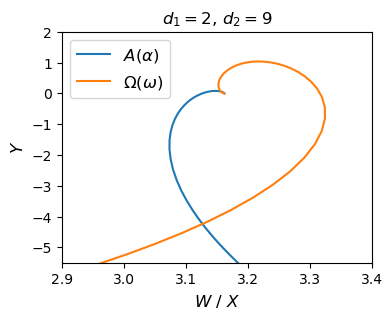

In [4]:
plot_29.plot([2.9,3.4],[-5.5,2],1)

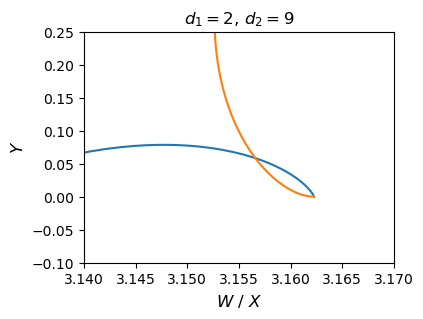

In [5]:
plot_29.plot([3.14,3.17],[-.1,.25],2)

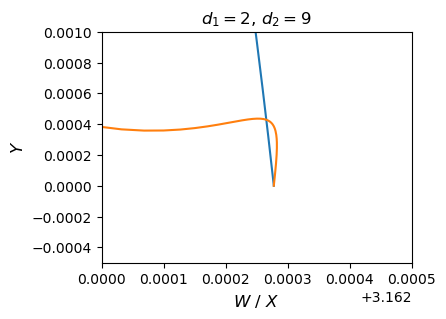

In [6]:
plot_29.plot([3.162,3.1625],[-0.0005,.001],3)

## $n = 10$

In [39]:
plotters = []
for d1 in [2, 3, 4]:
    d2 = 9 - d1
    plotter = Plotter(d1, d2)
    plotter.compute_Alphas(np.logspace(-4,-2,97), 10)
    plotter.compute_Alphas(np.linspace(0.01,10,97), 10)
    plotter.compute_Alphas(np.logspace(1,3,97), 10)
    plotter.compute_Omegas(np.linspace(0.1,10,97), 10)
    plotter.compute_Omegas(np.logspace(1,3,97), 10)
    plotters.append(plotter)

100%|██████████| 97/97 [00:00<00:00, 368855.38it/s]


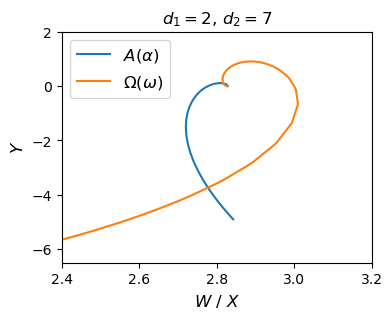

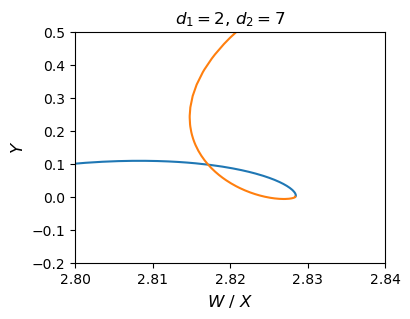

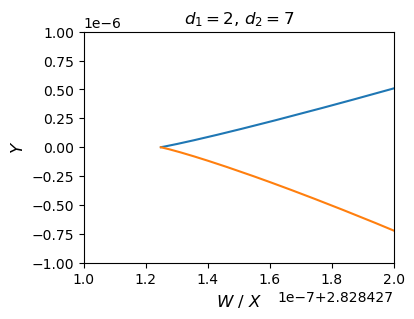

In [60]:
# d_1 = 2, d_2 = 7
plotters[0].plot([2.4,3.2],[-6.5,2],1)
plotters[0].plot([2.8,2.84],[-0.2,0.5],2)
plotters[0].plot([2.8284271,2.8284272],[-0.000001,0.000001],3)

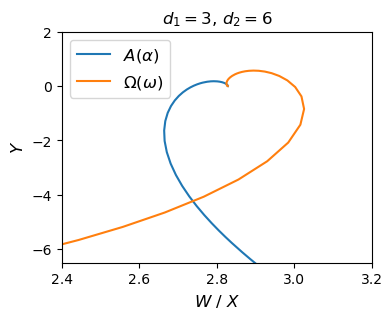

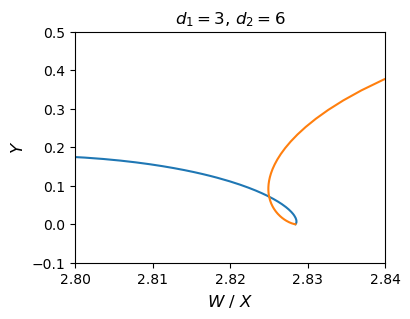

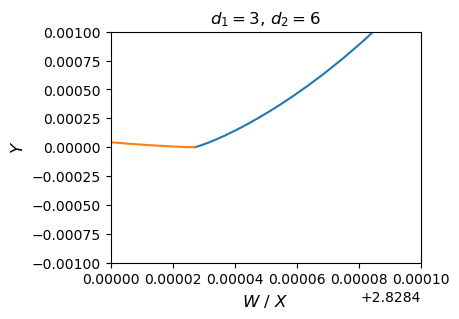

In [50]:
# d_1 = 3, d_2 = 6
plotters[1].plot([2.4,3.2],[-6.5,2],1)
plotters[1].plot([2.8,2.84],[-0.1,0.5],2)
plotters[1].plot([2.8284,2.8285],[-0.001,0.001],3)

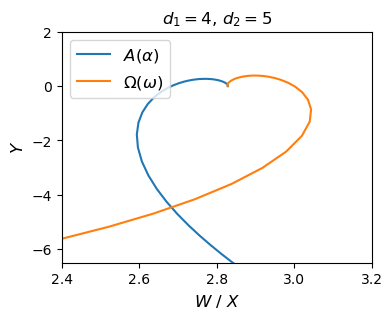

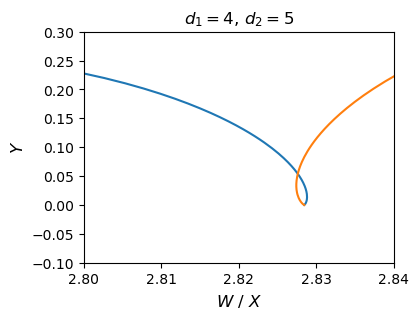

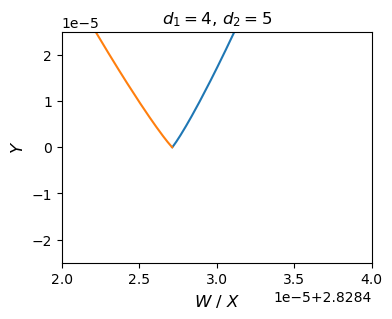

In [53]:
# d_1 = 4, d_2 = 5
plotters[2].plot([2.4,3.2],[-6.5,2],1)
plotters[2].plot([2.8,2.84],[-0.1,0.3],2)
plotters[2].plot([2.82842,2.82844],[-0.000025,0.000025],3)

## $n = 9$

In [61]:
d1, d2 = 2, 6
plotter = Plotter(d1, d2)
plotter.compute_Alphas(np.logspace(-4,-2,97), 10)
plotter.compute_Alphas(np.linspace(0.01,10,97), 10)
plotter.compute_Alphas(np.logspace(1,3,97), 10)
plotter.compute_Omegas(np.linspace(0.1,10,97), 10)
plotter.compute_Omegas(np.logspace(1,3,97), 10)

100%|██████████| 97/97 [00:00<00:00, 257661.49it/s]


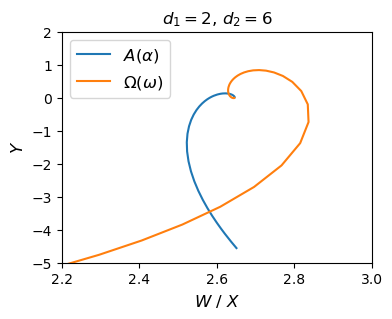

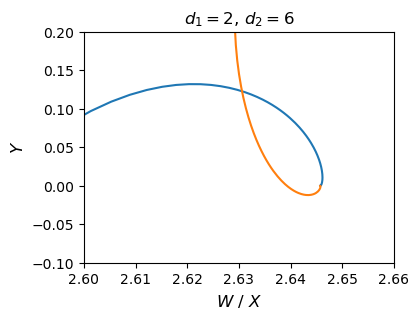

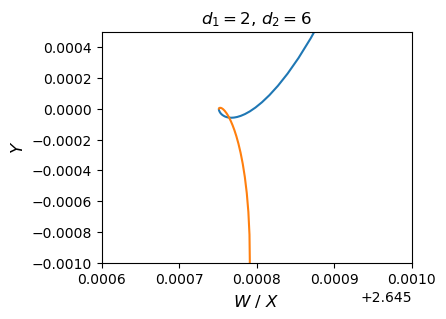

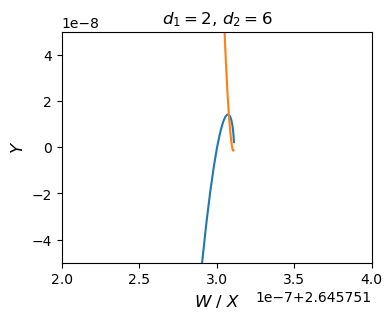

In [36]:
plotter.plot([2.2,3],[-5,2],1)
plotter.plot([2.6,2.66],[-0.1,0.2],2)
plotter.plot([2.6456,2.646],[-0.001,0.0005],3)
plotter.plot([2.6457512,2.6457514], [-0.00000005,0.00000005], 4)
# Do fourth plot

## $n = 12$

In [13]:
d1, d2 = 3, 8
plotter = Plotter(d1, d2)
#plotter.compute_Alphas(np.logspace(-4,-2,97), 10)
plotter.compute_Alphas(np.linspace(0.01,10,97), 10)
plotter.compute_Alphas(np.logspace(1,3,97), 10)
plotter.compute_Omegas(np.linspace(0.1,10,97), 10)
plotter.compute_Omegas(np.logspace(1,3,97), 10)

100%|██████████| 97/97 [00:00<00:00, 384180.82it/s]


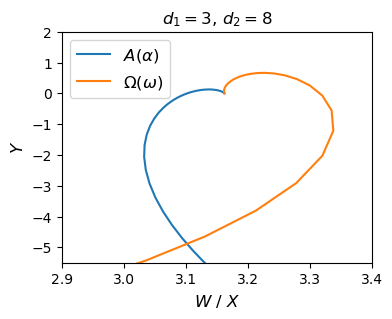

In [14]:
plotter.plot([2.9,3.4],[-5.5,2],1)

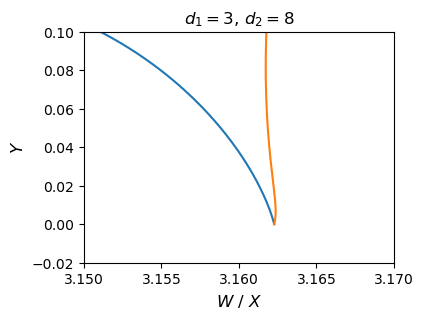

In [15]:
plotter.plot([3.15,3.17],[-.02,.1],2)

In [16]:
d1, d2 = 4, 7
plotter = Plotter(d1, d2)
#plotter.compute_Alphas(np.logspace(-4,-2,97), 10)
plotter.compute_Alphas(np.linspace(0.01,10,97), 10)
plotter.compute_Alphas(np.logspace(1,3,97), 10)
plotter.compute_Omegas(np.linspace(0.1,10,97), 10)
plotter.compute_Omegas(np.logspace(1,3,97), 10)

100%|██████████| 97/97 [00:00<00:00, 273787.00it/s]


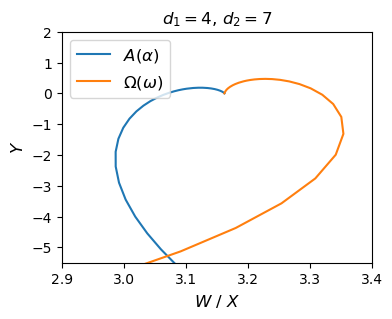

In [17]:
plotter.plot([2.9,3.4],[-5.5,2],1)

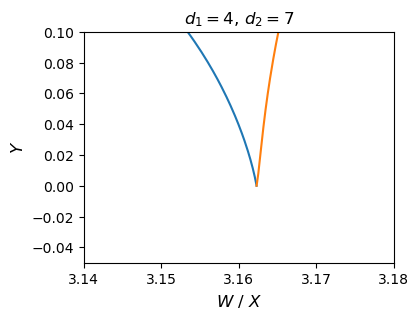

In [18]:
plotter.plot([3.14,3.18],[-.05,.1],2)

In [19]:
d1, d2 = 5, 6
plotter = Plotter(d1, d2)
#plotter.compute_Alphas(np.logspace(-4,-2,97), 10)
plotter.compute_Alphas(np.linspace(0.01,10,97), 10)
plotter.compute_Alphas(np.logspace(1,3,97), 10)
plotter.compute_Omegas(np.linspace(0.1,10,97), 10)
plotter.compute_Omegas(np.logspace(1,3,97), 10)

100%|██████████| 97/97 [00:00<00:00, 467103.89it/s]


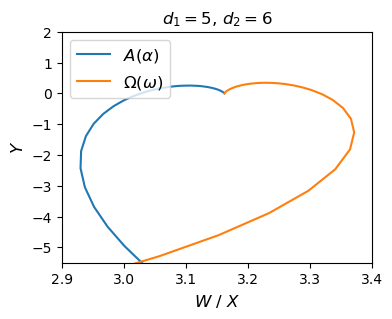

In [20]:
plotter.plot([2.9,3.4],[-5.5,2],1)

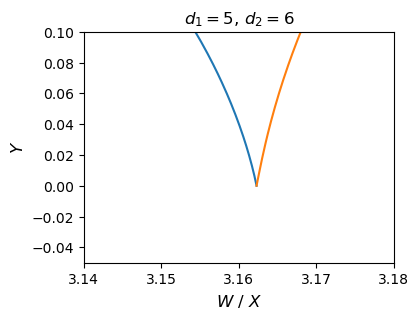

In [21]:
plotter.plot([3.14,3.18],[-.05,.1],2)